In [1]:
import pandas as pd

In [3]:
df=pd.read_csv(r'C:\Users\rohit\Downloads\kyphosis.csv')

In [14]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [15]:
df.isnull()

,Kyphosis,Age,Number,Start
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
76,False,False,False,False
77,False,False,False,False
78,False,False,False,False
79,False,False,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

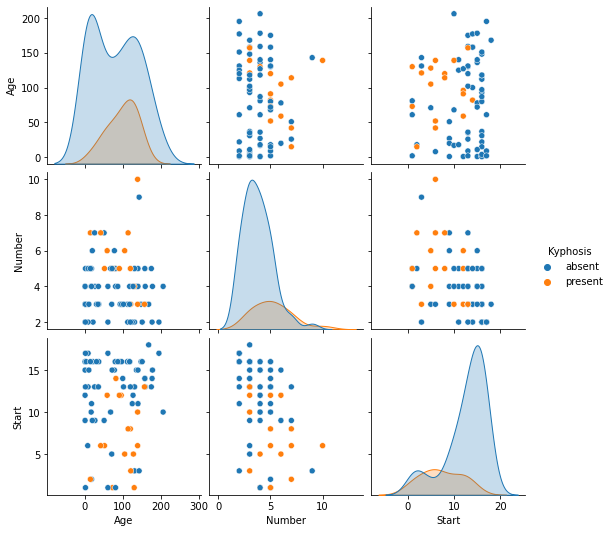

In [16]:
sns.pairplot(df,hue='Kyphosis')

In [19]:
from sklearn.model_selection import train_test_split

In [22]:
x=df.drop('Kyphosis',axis='columns')

In [24]:
y=df.Kyphosis

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [46]:
x_test

,Age,Number,Start
51,9,2,17
66,195,2,17
79,42,7,6
50,68,5,10
42,143,9,3
21,105,6,5
69,15,5,16
60,130,4,1
38,20,6,9
31,125,2,11


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
model=RandomForestClassifier(n_estimators=30)

In [100]:
model

RandomForestClassifier(n_estimators=30)

In [101]:
model.fit(x_train,y_train)


RandomForestClassifier(n_estimators=30)

In [102]:
model.score(x_test,y_test)

0.8235294117647058

In [50]:
y_predicted=model.predict(x_test)
y_predicted

array(['absent', 'absent', 'present', 'present', 'present', 'present',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present'], dtype=object)

In [48]:
from sklearn.metrics import confusion_matrix


In [51]:
cm=confusion_matrix(y_test,y_predicted)

In [52]:
cm

array([[10,  3],
       [ 1,  3]], dtype=int64)

Text(69.0, 0.5, 'Truth')

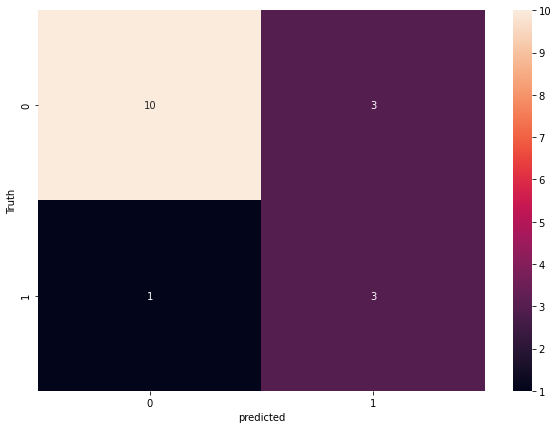

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [62]:
from sklearn import tree

In [64]:
model=tree.DecisionTreeClassifier()

In [65]:
model

DecisionTreeClassifier()

In [67]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
model.score(x_train,y_train)

1.0

In [69]:
y1_predicted=model.predict(x_test)
y1_predicted

array(['absent', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'present', 'present', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent'], dtype=object)

In [70]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()



clf = clf.fit(x,y)

[Text(334.8, 513.4, 'X[2] <= 8.5\ngini = 0.332\nsamples = 81\nvalue = [64, 17]'),
 Text(191.31428571428572, 453.0, 'X[0] <= 11.5\ngini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(143.4857142857143, 392.6, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(239.14285714285714, 392.6, 'X[2] <= 5.5\ngini = 0.457\nsamples = 17\nvalue = [6, 11]'),
 Text(191.31428571428572, 332.2, 'X[0] <= 130.5\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(143.4857142857143, 271.8, 'X[0] <= 93.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(95.65714285714286, 211.39999999999998, 'X[1] <= 4.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(47.82857142857143, 151.0, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(143.4857142857143, 151.0, 'X[0] <= 16.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(95.65714285714286, 90.59999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(191.31428571428572, 90.59999999999997, 'X[2] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(

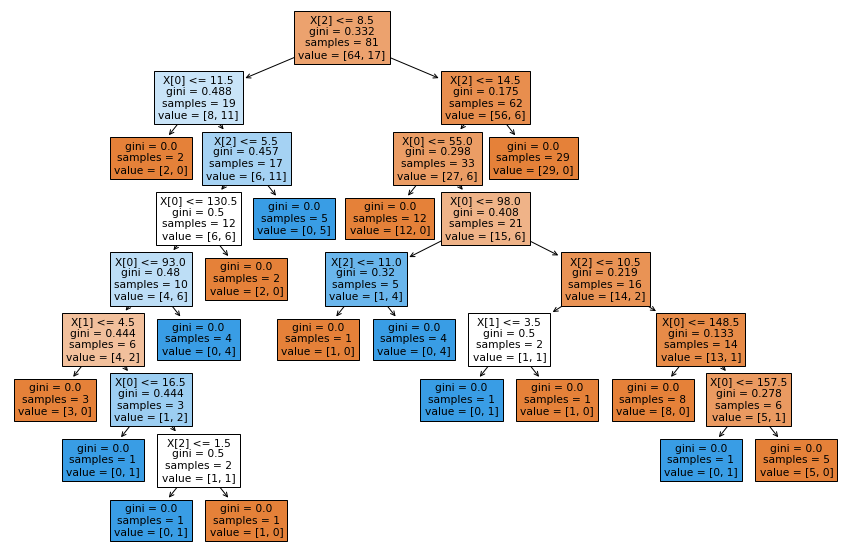

In [71]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)